## Import data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Read data

In [2]:
df = pd.read_csv('dev.csv')
df

,ID,Parent,Component,Line,Column,EndLine,EndColumn,CC,CCL,CCO,...,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules,bugs
0,L725,L874,L103,44,1,223,2,0.082397,1,3,...,0,0,0,3,0,0,0,0,0,False
1,L7984,L8766,L103,10,1,43,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
2,L6110,L5338,L103,14,1,67,2,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,False
3,L7289,L6714,L103,13,1,59,2,0.543860,1,4,...,2,0,0,0,0,0,0,0,0,False
4,L4437,L8973,L103,9,1,34,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,L1602,L20362,L103,33,1,86,2,0.441441,1,1,...,0,0,0,3,0,0,0,0,0,False
71803,L771,L37692,L103,29,1,85,2,0.000000,0,0,...,1,2,0,1,0,0,0,0,0,False
71804,L30823,L30750,L103,308,87,313,18,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
71805,L50337,L50312,L103,118,111,128,10,1.000000,2,6,...,0,0,0,0,0,0,0,0,0,False


### Exclude the first and the last columns

In [3]:
df = df.iloc[:, :-1]
df = df.iloc[:, 1:]
df = df._get_numeric_data()
df

,Line,Column,EndLine,EndColumn,CC,CCL,CCO,CI,CLC,CLLC,...,Migration15.Rules,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules
0,44,1,223,2,0.082397,1,3,1,0.055556,0.064935,...,0,0,0,0,3,0,0,0,0,0
1,10,1,43,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,14,1,67,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
3,13,1,59,2,0.543860,1,4,2,0.468085,0.523810,...,0,2,0,0,0,0,0,0,0,0
4,9,1,34,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,33,1,86,2,0.441441,1,1,1,0.185185,0.227273,...,0,0,0,0,3,0,0,0,0,0
71803,29,1,85,2,0.000000,0,0,0,0.000000,0.000000,...,0,1,2,0,1,0,0,0,0,0
71804,308,87,313,18,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
71805,118,111,128,10,1.000000,2,6,2,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0


### Get the first 1000 rows

In [4]:
df = df.head(1000)
df

,Line,Column,EndLine,EndColumn,CC,CCL,CCO,CI,CLC,CLLC,...,Migration15.Rules,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules
0,44,1,223,2,0.082397,1,3,1,0.055556,0.064935,...,0,0,0,0,3,0,0,0,0,0
1,10,1,43,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,14,1,67,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
3,13,1,59,2,0.543860,1,4,2,0.468085,0.523810,...,0,2,0,0,0,0,0,0,0,0
4,9,1,34,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,55,54,63,10,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
996,156,92,166,10,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
997,29,1,140,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
998,646,5,661,6,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


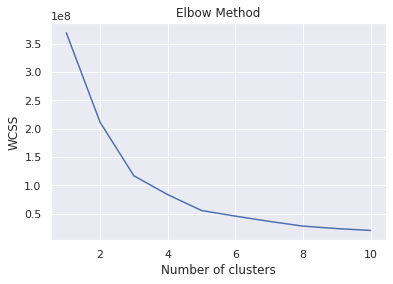

In [5]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans(5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [7]:
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       1, 0, 0, 1, 0, 2, 2, 3, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 4,
       0, 0, 0, 0, 2, 4, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 4, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 4, 2, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 2, 1, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2,

In [8]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 

In [9]:
data_with_clusters

,Line,Column,EndLine,EndColumn,CC,CCL,CCO,CI,CLC,CLLC,...,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules,Clusters
0,44,1,223,2,0.082397,1,3,1,0.055556,0.064935,...,0,0,0,3,0,0,0,0,0,0
1,10,1,43,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,14,1,67,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
3,13,1,59,2,0.543860,1,4,2,0.468085,0.523810,...,2,0,0,0,0,0,0,0,0,0
4,9,1,34,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,55,54,63,10,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
996,156,92,166,10,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
997,29,1,140,2,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
998,646,5,661,6,0.000000,0,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,2


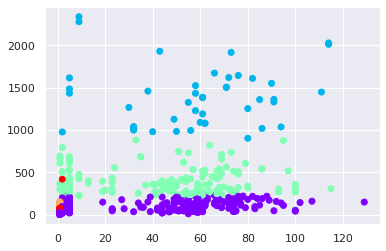

In [10]:
plt.scatter(data_with_clusters['Column'],data_with_clusters['Line'],c=data_with_clusters['Clusters'],cmap='rainbow')